# **CASE: COMPRA DE PERFUMES**

---

### Instalação de bibliotecas

In [1]:
# Para cálculo do VIF
install.packages("rms")
# Para cálculo do KS e AUC
install.packages("ROCR")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



### Carregamento de bibliotecas

In [2]:
library(rms)
library(ROCR)

Loading required package: Hmisc


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:base’:

    format.pval, units




### Leitura da base de dados

In [3]:
dados_perfume <- read.table(file = "Compra_Perfumes.txt",
                            sep = "\t",
                            dec = ",",
                            header = TRUE)

Warning message in file(file, "rt"):
“cannot open file 'Compra_Perfumes.txt': No such file or directory”


ERROR: Error in file(file, "rt"): cannot open the connection


### Visualização da base de dados

In [6]:
View(dados_perfume)

ID_Cliente,Genero,Idade,Cidade,Sistema_Operac,Utilizou_Cupom
<int>,<chr>,<int>,<chr>,<chr>,<int>
1,Feminino,35,Sao_Paulo,iOS,0
2,Feminino,35,Sao_Paulo,Android,0
3,Feminino,38,Sao_Paulo,Android,0
4,Feminino,41,Sao_Paulo,Outros,0
5,Masculino,46,Sao_Paulo,Android,0
6,Masculino,42,Sao_Paulo,iOS,0
7,Feminino,38,Rio_Janeiro,Android,0
8,Feminino,39,Sao_Paulo,iOS,1
9,Feminino,42,Rio_Janeiro,Android,0


### Análise exploratória breve

In [4]:
# Medidas resumo: idade
summary(dados_perfume$Idade)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.00   35.00   38.00   38.28   42.00   66.00 

In [5]:
# Tabela de frequências: gênero
table(dados_perfume$Genero)
prop.table(table(dados_perfume$Genero))


 Feminino Masculino 
     9153      3487 


 Feminino Masculino 
0.7241297 0.2758703 

In [6]:
# Tabela de frequências: cidade
table(dados_perfume$Cidade)
prop.table(table(dados_perfume$Cidade))


Belo_Horizonte       Curitiba    Rio_Janeiro      Sao_Paulo 
           985            672           4023           6960 


Belo_Horizonte       Curitiba    Rio_Janeiro      Sao_Paulo 
    0.07792722     0.05316456     0.31827532     0.55063291 

In [7]:
# Tabela de frequências: sistema operacional
table(dados_perfume$Sistema_Operac)
prop.table(table(dados_perfume$Sistema_Operac))


Android  Outros     iOS 
   6395    1195    5050 


   Android     Outros        iOS 
0.50593354 0.09454114 0.39952532 

In [8]:
# Tabela de frequências: utilização do cupom
table(dados_perfume$Utilizou_Cupom)
prop.table(table(dados_perfume$Utilizou_Cupom))


    0     1 
11980   660 


         0          1 
0.94778481 0.05221519 

### Análise bivariada: variáveis resposta vs. variáveis explicativas

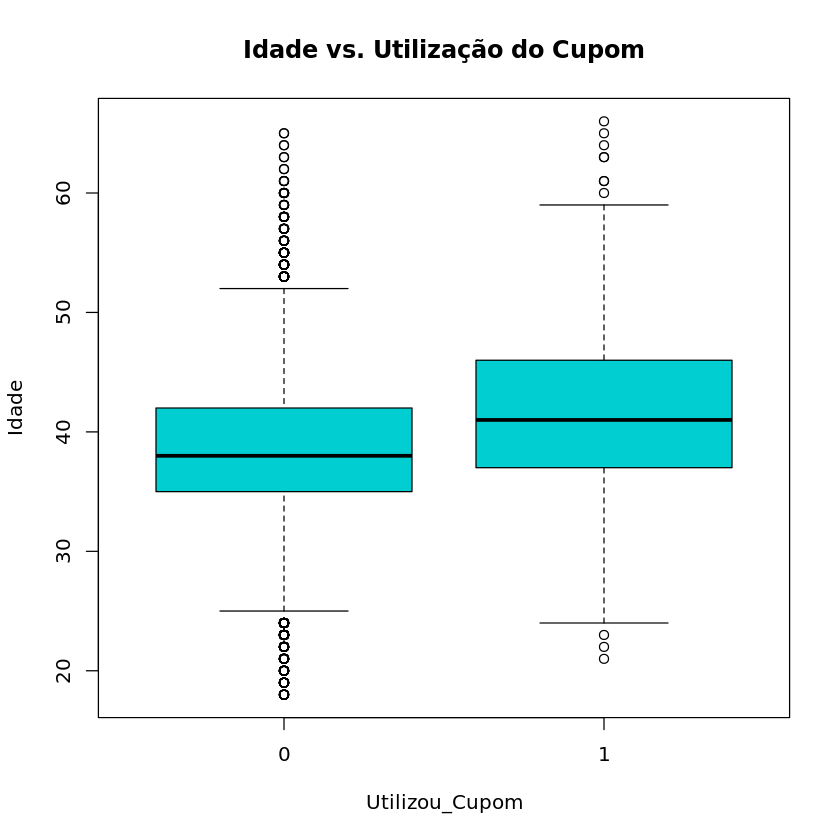

In [9]:
# Gráfico de boxplots: idade versus resposta
boxplot(Idade ~ Utilizou_Cupom, data = dados_perfume, col = "darkturquoise", main = "Idade vs. Utilização do Cupom")

In [10]:
# Tabela de frequências: gênero versus resposta (somando 100% nas linhas)
table(dados_perfume$Genero, dados_perfume$Utilizou_Cupom)
prop.table(table(dados_perfume$Genero, dados_perfume$Utilizou_Cupom), 1)

           
               0    1
  Feminino  8571  582
  Masculino 3409   78

           
                     0          1
  Feminino  0.93641429 0.06358571
  Masculino 0.97763120 0.02236880

In [14]:
# Tabela de frequências: cidade versus resposta (somando 100% nas linhas)
table(dados_perfume$Cidade, dados_perfume$Utilizou_Cupom)
prop.table(table(dados_perfume$Cidade, dados_perfume$Utilizou_Cupom), 1)

                
                    0    1
  Belo_Horizonte  895   90
  Curitiba        618   54
  Rio_Janeiro    3772  251
  Sao_Paulo      6695  265

                
                          0          1
  Belo_Horizonte 0.90862944 0.09137056
  Curitiba       0.91964286 0.08035714
  Rio_Janeiro    0.93760875 0.06239125
  Sao_Paulo      0.96192529 0.03807471

In [15]:
# Tabela de frequências: sistema operacional versus resposta (somando 100% nas linhas)
table(dados_perfume$Sistema_Operac, dados_perfume$Utilizou_Cupom)
prop.table(table(dados_perfume$Sistema_Operac, dados_perfume$Utilizou_Cupom), 1)

         
             0    1
  Android 6073  322
  iOS     4789  261
  Outros  1118   77

         
                   0          1
  Android 0.94964816 0.05035184
  iOS     0.94831683 0.05168317
  Outros  0.93556485 0.06443515

### Modelo de regressão logística múltipla

In [16]:
# Comando auxiliar para para omitir notação científica nos p-valores e controlar largura dos outputs na tela do Colab
options(scipen = 999, width = 200)

In [17]:
# Ajuste do modelo 1: inicial
regressao_1 <- glm(Utilizou_Cupom ~
                     Genero +
                     Idade +
                     Cidade +
                     Sistema_Operac,
                   family = binomial(link = 'logit'),
                   data = dados_perfume)

summary(regressao_1)


Call:
glm(formula = Utilizou_Cupom ~ Genero + Idade + Cidade + Sistema_Operac, 
    family = binomial(link = "logit"), data = dados_perfume)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1241  -0.3637  -0.2814  -0.2007   3.2582  

Coefficients:
                      Estimate Std. Error z value             Pr(>|z|)    
(Intercept)          -5.588703   0.289323 -19.316 < 0.0000000000000002 ***
GeneroMasculino      -1.127865   0.123387  -9.141 < 0.0000000000000002 ***
Idade                 0.087793   0.006238  14.074 < 0.0000000000000002 ***
CidadeCuritiba       -0.068981   0.197877  -0.349              0.72739    
CidadeRio_Janeiro    -0.431917   0.134592  -3.209              0.00133 ** 
CidadeSao_Paulo      -0.956902   0.132815  -7.205    0.000000000000581 ***
Sistema_OperaciOS     0.005315   0.092899   0.057              0.95438    
Sistema_OperacOutros  0.232414   0.137429   1.691              0.09081 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘

In [18]:
# Ajuste do modelo 2: retirando Sistema_Operac
regressao_2 <- glm(Utilizou_Cupom ~
                     Genero +
                     Idade +
                     Cidade,
                   family = binomial(link = 'logit'),
                   data = dados_perfume)

summary(regressao_2)


Call:
glm(formula = Utilizou_Cupom ~ Genero + Idade + Cidade, family = binomial(link = "logit"), 
    data = dados_perfume)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1229  -0.3682  -0.2843  -0.2027   3.2502  

Coefficients:
                   Estimate Std. Error z value             Pr(>|z|)    
(Intercept)       -5.538180   0.280799 -19.723 < 0.0000000000000002 ***
GeneroMasculino   -1.130207   0.123361  -9.162 < 0.0000000000000002 ***
Idade              0.087654   0.006232  14.065 < 0.0000000000000002 ***
CidadeCuritiba    -0.113573   0.184014  -0.617              0.53710    
CidadeRio_Janeiro -0.449736   0.131397  -3.423              0.00062 ***
CidadeSao_Paulo   -0.975022   0.129970  -7.502   0.0000000000000629 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 5182.1  on 12639  degrees of freedom
Residual deviance: 4807.3  on 12634  degrees of freedom
AIC:

In [19]:
# Avaliação de colinearidade no modelo 2
data.frame(VIF = vif(regressao_2))

ERROR: Error in vif(regressao_2): could not find function "vif"


### Intervalos de confiança

In [20]:
# Escolha do beta (0 para intercepto, ou 1, 2, ... para os parâmetros referentes a cada variável explicativa)
beta = 0

In [21]:
# Cálculo do intervalo
print("Limite inferior")
as.numeric(regressao_2$coefficients[beta + 1] - 1.96 * coef(summary(regressao_2))[beta + 1, "Std. Error"])
print("Limite superior")
as.numeric(regressao_2$coefficients[beta + 1] + 1.96 * coef(summary(regressao_2))[beta + 1, "Std. Error"])

[1] "Limite inferior"


[1] -6.088545

[1] "Limite superior"


[1] -4.987815

### Aplicação do modelo e definição de resposta predita

In [22]:
# Aplicação do modelo na base (criação de uma nova coluna chamada "probabilidade")
dados_perfume$probabilidade <- predict(regressao_2,
                                       dados_perfume,
                                       type = "response")

In [23]:
# Definição de ponto de corte (padrão: % de 1's na amostra)
ponto_corte <- mean(dados_perfume$Utilizou_Cupom)
ponto_corte

[1] 0.05221519

In [24]:
# Definição da resposta predita pelo modelo (criação de uma nova coluna chamada "predito")
dados_perfume$predito <- as.factor(ifelse(dados_perfume$probabilidade > ponto_corte, 1, 0))

### Análise de desempenho

In [25]:
# Tabela de classificação
tabela <- table(dados_perfume$Utilizou_Cupom, dados_perfume$predito)

In [26]:
# Acurácia
(tabela[1,1] + tabela[2,2]) / sum(tabela)

[1] 0.6512658

In [27]:
# Especificidade
tabela[1,1] / (tabela[1,1] + tabela[1,2])

[1] 0.6502504

In [28]:
# Sensibilidade
tabela[2,2] / (tabela[2,1] + tabela[2,2])

[1] 0.669697

In [ ]:
# KS
pred <- prediction(dados_perfume$probabilidade, dados_perfume$Utilizou_Cupom)
perf <- performance(pred, "tpr", "fpr")
ks <- max(attr(perf, 'y.values')[[1]] - attr(perf, 'x.values')[[1]])

print(ks)

In [ ]:
# AUC
pred <- prediction(dados_perfume$probabilidade, dados_perfume$Utilizou_Cupom)
auc <- performance(pred, "auc")
auc <- auc@y.values[[1]]

print(auc)

### Exemplo de uso (aplicação) do modelo

In [ ]:
# Criação de base de dados com um novo cliente, do gênero feminino, com 50 anos de idade e que mora na cidade de São Paulo
# Obs.: os nomes das colunas e padrão de conteúdo devem ser idênticos aos da base utilizada para construção do modelo
novos_dados <- data.frame(Genero = c("Feminino"),
                          Idade  = c(50),
                          Cidade = c("Sao_Paulo"))

In [ ]:
# Aplicação do modelo
novos_dados$PROB_USAR_CUPOM <- predict(regressao_2, novos_dados, type = "response")
View(novos_dados)